# Project: Image Classification for Beginners

For our upcoming machine learning project, we’ll be delving into image classification, a fascinating application of machine learning. In this project, we’ll explore how to build an image classification model from scratch, allowing you the flexibility to choose the best model for the task.

__Problem Statement__
    
Our goal is to develop a machine learning model to classify images into different categories. This project will challenge us to leverage our knowledge of machine learning techniques to build a robust image classifier.

__Dataset__
    
You can choose any of the following popular image datasets like CIFAR-10, CIFAR100, MNIST, or Fashion-MNIST. Alternatively, we can curate a custom dataset relevant to a specific domain or application.

-------------------

## 1. Project Task 1: Data Exploration

Let’s start by exploring the image dataset to understand its structure, image dimensions, and the number of classes/categories. (3 marks)

In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## 1.1 Import Libraries
- All essential libraries are imported in this step.
- For better performance, Please run this notebook on Google Colab.

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

/var/folders/n_/m1r459rs0791ms5jrfn_crhw0000gn/T/ipykernel_45896/2619342181.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 1.2 Understand the Image Dataset

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

The classes in the dataset are:
<table>
<thead>
<tr>
<th style="text-align: center">Label</th>
<th>Description</th>
</tr>
</thead>

<tbody>
<tr>
<td style="text-align: center">0</td>
<td>airplane</td>
</tr>
<tr>
<td style="text-align: center">1</td>
<td>automobile</td>
</tr>
<tr>
<td style="text-align: center">2</td>
<td>bird</td>
</tr>
<tr>
<td style="text-align: center">3</td>
<td>cat</td>
</tr>
<tr>
<td style="text-align: center">4</td>
<td>deer</td>
</tr>
<tr>
<td style="text-align: center">5</td>
<td>dog</td>
</tr>
<tr>
<td style="text-align: center">6</td>
<td>frog</td>
</tr>
<tr>
<td style="text-align: center">7</td>
<td>horse</td>
</tr>
<tr>
<td style="text-align: center">8</td>
<td>ship</td>
</tr>
<tr>
<td style="text-align: center">9</td>
<td>truck</td>
</tr>
</tbody>
</table>

In [4]:
# Total classes in CIFAR-10 dataset
classes = np.unique(y_train)
nClasses = len(classes)
print("Total number of outputs : ", nClasses)
print("Output classes : ", classes)

# Check data dimension
print("X_train data shape is", x_train.shape)
print("y_train data shape is", y_train.shape)
print("X_test data shape is", x_test.shape)
print("y_test data shape is", y_test.shape)

# Check data type
print("X_train data type is", x_train.dtype)
print("y_train data type is", y_train.dtype)
print("X_test data type is", x_test.dtype)
print("y_test data type is", y_test.dtype)


%pip install prettytable
# print dimensions of the dataset and data type of the dataset as a Table by using PrettyTable
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Data", "Shape", "Data Type"]
x.add_row(["X_train", x_train.shape, x_train.dtype])
x.add_row(["y_train", y_train.shape, y_train.dtype])
x.add_row(["X_test", x_test.shape, x_test.dtype])
x.add_row(["y_test", y_test.shape, y_test.dtype])
print(x)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
X_train data shape is (50000, 32, 32, 3)
y_train data shape is (50000, 1)
X_test data shape is (10000, 32, 32, 3)
y_test data shape is (10000, 1)
X_train data type is uint8
y_train data type is uint8
X_test data type is uint8
y_test data type is uint8


Note: you may need to restart the kernel to use updated packages.
+---------+--------------------+-----------+
|   Data  |       Shape        | Data Type |
+---------+--------------------+-----------+
| X_train | (50000, 32, 32, 3) |   uint8   |
| y_train |     (50000, 1)     |   uint8   |
|  X_test | (10000, 32, 32, 3) |   uint8   |
|  y_test |     (10000, 1)     |   uint8   |
+---------+--------------------+-----------+


Display several images from the dataset to understand the image quality and the content of the images.

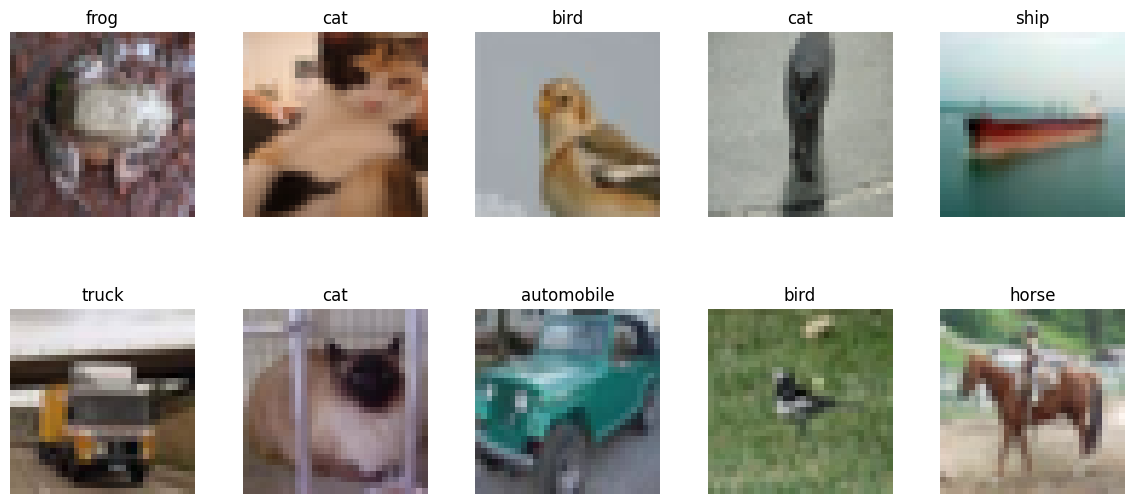

In [5]:
# Pick a random image from the dataset
import matplotlib.pyplot as plt
import numpy as np

# Define the text labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot random first few images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = 0.5, wspace=.001)
ax = ax.ravel()
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    ax[i].imshow(x_train[idx])
    ax[i].set_title(cifar10_labels[y_train[idx][0]])
    ax[i].axis('off')
plt.show()

## 1.3 Data Preparation

### 1.3.1 Image Normalization
- Normalize the images to a pixel value between 0 and 1.
- Normalizing the images will make the model train faster. Because the model has to deal with smaller values.

In [6]:
# Image normalization for CIFAR-10 dataset and prepare the data for training the CNN model.
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

---------------

### 1.3.2 Coverting Labels to Categorical
- Convert the labels into a set of 10 numbers to input into the neural network.
- For example, the label 3 will be represented as 0 0 0 1 0 0 0 0 0 0.
- This is done to avoid the model misinterpreting the labels as being in some kind of order and help the model understand that the labels are categorical.

In [7]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, nClasses)
y_test = keras.utils.to_categorical(y_test, nClasses)

----

### 1.3.4 Data Augmentation

- Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

- The purpose is to reduce model overfitting by exposing our model to variations and small transformations in the original data.

- It is useful especially when we do not have a large dataset.
Note that the image augmentation needs to be realistic. For example, flipping car images upside down may not be the best choice here since we expect most cars to be photographed with the wheels on the ground (barring severe accidents)

- To perform data augmentation, we use the Keras ImageDataGenerator class. This class allows us to configure random transformations and normalization operations to be done on our image data during training.

- We will only perform a random horizontal flip for the images for the sake of simplicity, though do note that there is a wide range of different augmentations available to us: https://keras.io/api/layers/preprocessing_layers/image_augmentation/

In [8]:
def augment_image(image, label):
    # Apply your augmentation operations using tf.image
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    # Add more augmentation operations as needed
    return image, label

View effects of augmentation on a sample image.

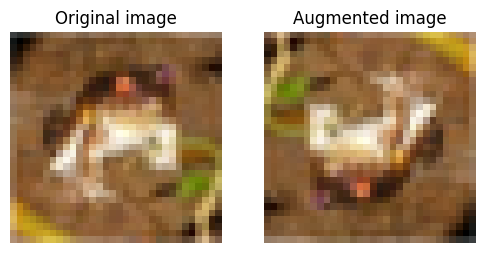

In [13]:
for image, label in zip(x_train[:1], y_train[:1]):
    # Display the original image and side-by-side with the augmented image
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(augment_image(image, label)[0])
    plt.axis('off')
    plt.show()


-------

## 2. Model Selection

Now comes the exciting part – choosing the best model for image classification! You have the freedom to experiment with various machine learning and deep learning models, including but not limited to Support Vector Machines (SVMs), Decision Trees, Random Forests, Convolutional Neural Networks (CNNs), and more. (5 marks)

- In this project, I will experiment only 2 Models; Convolutional Neural Networks (CNNs) and Transfer Learning using VGG16.
- I will compare the performance of both models and choose the best model for the task.

---

### 2.1 Setup Model VGG16

- VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

In [14]:
# setup model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(nClasses, activation='softmax'))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Display model summary.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

---

### 2.2 Compile the Model

- Utilize the Adam optimizer and the categorical cross-entropy loss function.
- The Adam optimizer is a popular choice because it is computationally efficient, requires little memory, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data or parameters.

In [16]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Include early stopping to monitor and prevent overfitting.

In [17]:
# Define early stopping callback when overfitting occurs.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

## 3. Model Training

Fit model
- Train the model on the training data. For faster training on the Google Colab, please use the GPU runtime.
- Store the training history in a variable name `history`.

In [18]:
EPOCHS = 100
BATCH_SIZE = 64

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.3125 - loss: 1.8608 - val_accuracy: 0.5502 - val_loss: 1.2263
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.5611 - loss: 1.2310 - val_accuracy: 0.6539 - val_loss: 0.9800
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6545 - loss: 0.9887 - val_accuracy: 0.6877 - val_loss: 0.8964
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7056 - loss: 0.8443 - val_accuracy: 0.6941 - val_loss: 0.9011
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7329 - loss: 0.7611 - val_accuracy: 0.7643 - val_loss: 0.6853
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7581 - loss: 0.6893 - val_accuracy: 0.7597 - val_loss: 0.6944
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7803 - loss: 0.6339 - val_accuracy: 0.7767 - val_loss: 0.6658
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7889 - loss: 0

Plot the accuracy of training and validation sets over epochs

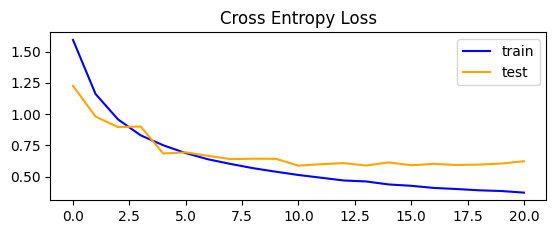

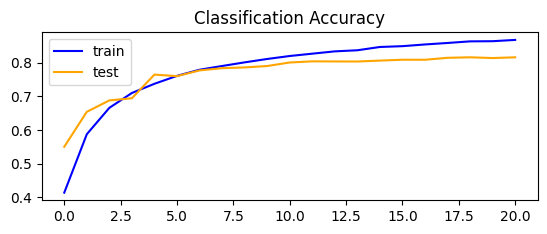

In [21]:
# plot Cross Entropy Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label='train', color='blue')
plt.plot(history.history['val_loss'], label='test', color='orange')
plt.legend()
plt.show()

# plot classification accuracy
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='test', color='orange')
plt.legend()
plt.show()

According to the plot and the training history, The model stops improving after 21 from 100 epochs because the EarlyStopping callback stops the training process for preventing overfitting.

---

## 3. Model Evaluation:

Evaluate the trained model’s performance on a separate validation set and fine-tune its hyperparameters to optimize performance further. (3 marks)


Now, I already applied the layer of Dropout to the model. Next, I will evaluate the model on the test set.

### 3.1 Data Augmentation

  Data augmentation involves making copies of the examples in the training dataset with small random modifications. This has a regularizing effect as it both expands the training dataset and allows the model to learn the same features, invariant to their position in the input.

  This can be implemented in Keras using the ImageDataGenerator class; for example:

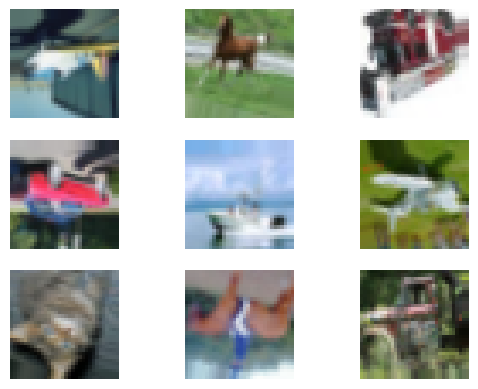

In [31]:
## Apply data augmentation to the CIFAR-10 dataset and train the CNN model.
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

it_train = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# preview augmented images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    batch = next(it_train)
    image = batch[0][0]
    plt.imshow(image)

In [33]:
step = int(x_train.shape[0] / BATCH_SIZE)
history = model.fit(it_train, steps_per_epoch=step, validation_data=(x_test, y_test), epochs=EPOCHS, callbacks=[early_stopping])

Epoch 1/100


  1/781 ━━━━━━━━━━━━━━━━━━━━ 10:25 802ms/step - accuracy: 0.4844 - loss: 1.8874

/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5488 - loss: 1.2891 - val_accuracy: 0.7283 - val_loss: 0.7957
Epoch 2/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.5781 - loss: 1.0387

2024-04-15 00:36:40.333119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5781 - loss: 1.0387 - val_accuracy: 0.7336 - val_loss: 0.7831
Epoch 3/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6322 - loss: 1.0536 - val_accuracy: 0.7043 - val_loss: 0.8812
Epoch 4/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.6875 - loss: 1.0455

2024-04-15 00:37:41.938584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6875 - loss: 1.0455 - val_accuracy: 0.7108 - val_loss: 0.8550
Epoch 5/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6540 - loss: 0.9935 - val_accuracy: 0.7624 - val_loss: 0.6945
Epoch 6/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.7344 - loss: 0.8726

2024-04-15 00:38:42.491937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7344 - loss: 0.8726 - val_accuracy: 0.7632 - val_loss: 0.6935
Epoch 7/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6650 - loss: 0.9519 - val_accuracy: 0.7362 - val_loss: 0.7854
Epoch 8/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.6562 - loss: 0.9237

2024-04-15 00:39:44.871810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6562 - loss: 0.9237 - val_accuracy: 0.7302 - val_loss: 0.8131
Epoch 9/100
781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6759 - loss: 0.9253 - val_accuracy: 0.7414 - val_loss: 0.7547
Epoch 10/100
  1/781 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.6406 - loss: 1.0583

2024-04-15 00:40:45.765956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6406 - loss: 1.0583 - val_accuracy: 0.7416 - val_loss: 0.7546
Epoch 10: early stopping


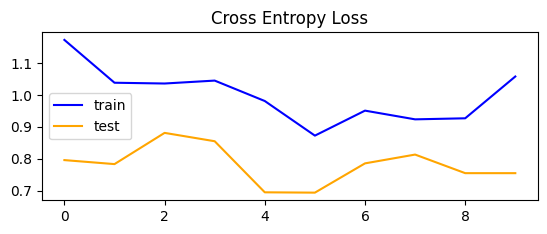

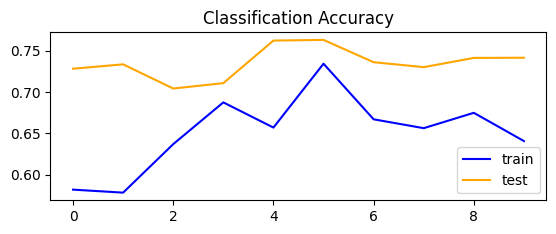

In [34]:
# plot Cross Entropy Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label='train', color='blue')
plt.plot(history.history['val_loss'], label='test', color='orange')
plt.legend()
plt.show()

# plot classification accuracy
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='test', color='orange')
plt.legend()
plt.show()

---

## 3.2 Batch Normalization

Batch normalization involves normalizing the activations of each layer to improve the training speed and stability. It is a simple but effective technique that can be used on the inputs to the layer before or after the activation function in the model.

In [ ]:
# Batch Normalization

## 3.3 Weight Initialization

The initialization of the network weights is important. The weights need to be small values, such as small random values in the range of 0 to 0.3 from a uniform distribution. This is because of the use of the rectifier (ReLU) activation function.


The initialization of the network weights is important. The weights need to be small values, such as small random values in the range of 0 to 0.3 from a uniform distribution. This is because of the use of the rectifier (ReLU) activation function.

In [ ]:
# weight initialization

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Fit the data augmentation
datagen.fit(x_train)

# Create a new model with dropout, Data Augmentation, Batch Normalization, learning rate scheduler, and weight decay
# Define the learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 50:
        lr *= 0.1
    elif epoch > 75:
        lr *= 0.01
    return lr

model = Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
# Add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Fit the data augmentation
datagen.fit(x_train)

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=100, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy and loss as a percentage
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss:.2f}')


In [ ]:
# plot Cross Entropy Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label='train', color='blue')
plt.plot(history.history['val_loss'], label='test', color='orange')
plt.legend()
plt.show()

# plot classification accuracy
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='test', color='orange')
plt.legend()
plt.show()

In the given scenario, we can see that the program reduced the learning rate to 0.0001 after passing through epoch 52. This change resulted in a more stable training rate and testing rate. However, after passing epoch 75, no significant change was observed in both Cross Entropy and Classification Accuracy.

To address overfitting, we explored two approaches and found that the second approach yielded better results, reducing overfitting gaps. The training and testing accuracies also increased and stabilized at high levels, which indicates a robust model.

Additional regularization techniques, such as more aggressive dropout in later layers or the addition of weight decay, could achieve further improvements.

We have yet to tune the hyperparameters of the learning algorithm, such as the learning rate, which can significantly impact the model's performance. We could use adaptive learning rate techniques such as Adam to refine the model once it has converged, which may result in further improvements.